# Import package


In [31]:
# install numpy
# install pandas
# install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score

# Cleaning data (Làm sạch dữ liệu)

In [32]:
data_frame_test = pd.read_csv("test.csv")
data_frame_train = pd.read_csv("train.csv")
data_frame = pd.concat([data_frame_test,data_frame_train],ignore_index = True)


Remote unnecessary columns

In [33]:
data_frame.sort_values(by = 'id')
data_frame = data_frame.drop(columns='Unnamed: 0')
data_frame = data_frame.drop(columns = 'id')

In [34]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Xử lí dữ liệu trùng (Duplicate Data)

In [35]:
print(data_frame.duplicated().sum())
data_frame.drop_duplicates(inplace=True)
data_frame

0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Xử lí dữ liệu thiếu (Missing Data)

In [36]:

print(data_frame.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [37]:

temp = np.round(data_frame['Arrival Delay in Minutes'].mean(),2)

data_frame['Arrival Delay in Minutes'].fillna(temp,inplace = True)


C:\Users\abc\AppData\Local\Temp\ipykernel_5220\592716239.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['Arrival Delay in Minutes'].fillna(temp,inplace = True)


In [38]:
data_frame.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [39]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Xử lí ngoại lai sử dụng IQR


In [40]:
df_copy_ol = data_frame.copy()

n_columns = df_copy_ol.select_dtypes(include = 'number')
for column in n_columns.columns:
    G1 = df_copy_ol[column].quantile(0.25)
    G3 = df_copy_ol[column].quantile(0.75)
    IQR = G3 - G1
    lower_limit = G1 - 1.5*IQR
    upper_limit = G3 + 1.5*IQR
    df_copy_ol = df_copy_ol[(df_copy_ol[column] > lower_limit) & (df_copy_ol[column] < upper_limit)]
    outliers = len(data_frame) - len(df_copy_ol)
    print(f'Columns {column}: remove {outliers} outliers')
df_copy_ol

Columns Age: remove 0 outliers
Columns Flight Distance: remove 2864 outliers
Columns Inflight wifi service: remove 2864 outliers
Columns Departure/Arrival time convenient: remove 2864 outliers
Columns Ease of Online booking: remove 2864 outliers
Columns Gate location: remove 2864 outliers
Columns Food and drink: remove 2864 outliers
Columns Online boarding: remove 2864 outliers
Columns Seat comfort: remove 2864 outliers
Columns Inflight entertainment: remove 2864 outliers
Columns On-board service: remove 2864 outliers
Columns Leg room service: remove 2864 outliers
Columns Baggage handling: remove 2864 outliers
Columns Checkin service: remove 18702 outliers
Columns Inflight service: remove 18706 outliers
Columns Cleanliness: remove 18706 outliers
Columns Departure Delay in Minutes: remove 34383 outliers
Columns Arrival Delay in Minutes: remove 47299 outliers


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
11,Female,Loyal Customer,33,Business travel,Business,325,2,5,5,5,...,2,2,2,2,3,2,4,18,7.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,4,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [41]:
df_copy_ol.shape

(82581, 23)

In [42]:
df_copy_ol.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

Rời rạc hóa dữ liệu

In [43]:
data_frame.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [44]:
n_columns.dtypes

Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: object

In [45]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'uniform')
df_copy_ol[n_columns.columns] = discretizer.fit_transform(df_copy_ol[n_columns.columns])

c:\anaconda\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Chuyển đổi kiểu object thành Dataframe

In [46]:
from sklearn.preprocessing import LabelEncoder
o_columns = df_copy_ol.select_dtypes(include = 'object')
for column in o_columns:
    df_copy_ol[column] = LabelEncoder().fit_transform(df_copy_ol[column])
df_copy_ol

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,0,0,1.0,0,0,3.0,1.0,1.0,3.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,4.0,0.0,0.0,1
2,1,1,0.0,0,1,0.0,2.0,0.0,2.0,4.0,...,2.0,3.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0
3,1,0,2.0,0,0,4.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,2.0,1
8,1,0,2.0,0,1,0.0,4.0,2.0,2.0,2.0,...,4.0,1.0,2.0,4.0,1.0,2.0,4.0,0.0,0.0,1
11,0,0,1.0,0,0,0.0,2.0,4.0,4.0,4.0,...,2.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,1,0,2.0,1,1,2.0,3.0,1.0,3.0,4.0,...,2.0,3.0,3.0,3.0,0.0,3.0,2.0,0.0,0.0,0
129875,0,1,1.0,0,1,0.0,2.0,1.0,2.0,3.0,...,2.0,2.0,1.0,3.0,0.0,2.0,2.0,0.0,0.0,0
129876,1,0,2.0,0,0,3.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1
129878,0,1,0.0,0,1,1.0,1.0,1.0,1.0,4.0,...,1.0,3.0,4.0,0.0,4.0,3.0,1.0,0.0,0.0,0


In [47]:
df_copy_ol = df_copy_ol.reset_index(drop = True)
df_copy_ol.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1.0,0,0,3.0,1.0,1.0,3.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,4.0,0.0,0.0,1
1,1,1,0.0,0,1,0.0,2.0,0.0,2.0,4.0,...,2.0,3.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0
2,1,0,2.0,0,0,4.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,2.0,1
3,1,0,2.0,0,1,0.0,4.0,2.0,2.0,2.0,...,4.0,1.0,2.0,4.0,1.0,2.0,4.0,0.0,0.0,1
4,0,0,1.0,0,0,0.0,2.0,4.0,4.0,4.0,...,2.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,2.0,0
5,0,0,2.0,0,0,1.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,1
6,0,0,2.0,0,0,1.0,2.0,2.0,2.0,2.0,...,4.0,3.0,4.0,3.0,1.0,3.0,4.0,1.0,0.0,1
7,1,0,2.0,1,1,0.0,3.0,4.0,0.0,3.0,...,2.0,3.0,2.0,3.0,3.0,4.0,2.0,0.0,0.0,0
8,0,0,1.0,0,1,0.0,2.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,3.0,2.0,2.0,0.0,0.0,0
9,1,0,2.0,1,2,1.0,4.0,4.0,4.0,3.0,...,4.0,2.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1


Chia dữ liệu

In [48]:
from sklearn.model_selection import train_test_split
x = df_copy_ol.drop(columns = 'satisfaction')
y = df_copy_ol['satisfaction']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
df_copy_ol.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1.0,0,0,3.0,1.0,1.0,3.0,1.0,...,4.0,3.0,4.0,3.0,1.0,3.0,4.0,0.0,0.0,1
1,1,1,0.0,0,1,0.0,2.0,0.0,2.0,4.0,...,2.0,3.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0
2,1,0,2.0,0,0,4.0,0.0,0.0,0.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,2.0,1
3,1,0,2.0,0,1,0.0,4.0,2.0,2.0,2.0,...,4.0,1.0,2.0,4.0,1.0,2.0,4.0,0.0,0.0,1
4,0,0,1.0,0,0,0.0,2.0,4.0,4.0,4.0,...,2.0,1.0,2.0,1.0,1.0,1.0,4.0,3.0,2.0,0
5,0,0,2.0,0,0,1.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,3.0,0.0,0.0,1
6,0,0,2.0,0,0,1.0,2.0,2.0,2.0,2.0,...,4.0,3.0,4.0,3.0,1.0,3.0,4.0,1.0,0.0,1
7,1,0,2.0,1,1,0.0,3.0,4.0,0.0,3.0,...,2.0,3.0,2.0,3.0,3.0,4.0,2.0,0.0,0.0,0
8,0,0,1.0,0,1,0.0,2.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,3.0,2.0,2.0,0.0,0.0,0
9,1,0,2.0,1,2,1.0,4.0,4.0,4.0,3.0,...,4.0,2.0,4.0,4.0,3.0,4.0,4.0,0.0,0.0,1


Chuẩn hóa dữ liệu

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [51]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Biểu đồ 1

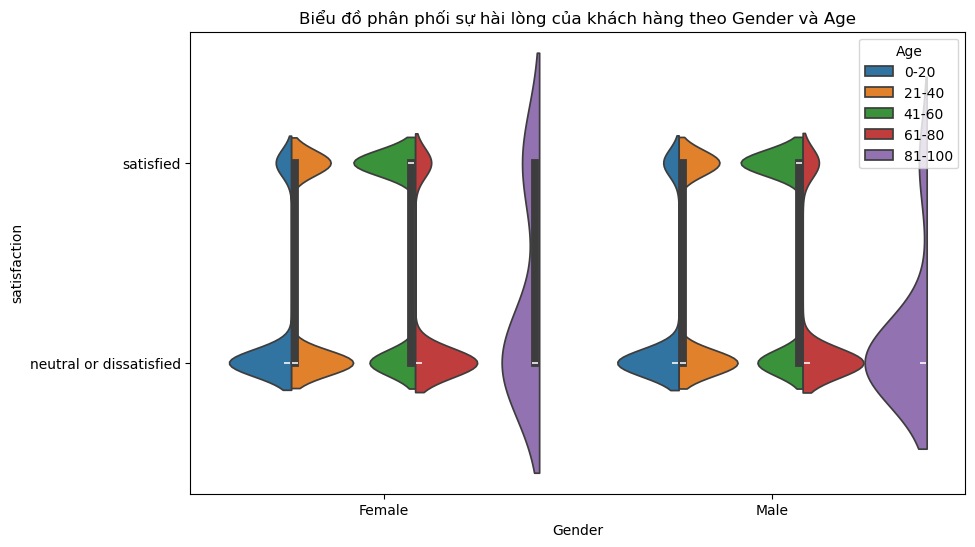

In [52]:
df_copy_1 = data_frame.copy()
bins = [0, 20, 40, 60, 80, 100] 
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df_copy_1['Age'] = pd.cut(df_copy_1['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='satisfaction', hue='Age', data=df_copy_1, split=True)
plt.title('Biểu đồ phân phối sự hài lòng của khách hàng theo Gender và Age')
plt.show()

In [53]:
data_frame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Biểu đồ 5

C:\Users\abc\AppData\Local\Temp\ipykernel_5220\1206999884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure Delay Group', y='satisfaction', data=data_frame_copy_8, ax=ax[0], palette='Blues')
C:\Users\abc\AppData\Local\Temp\ipykernel_5220\1206999884.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=data_frame_copy_8, ax=ax[1], palette='Reds')


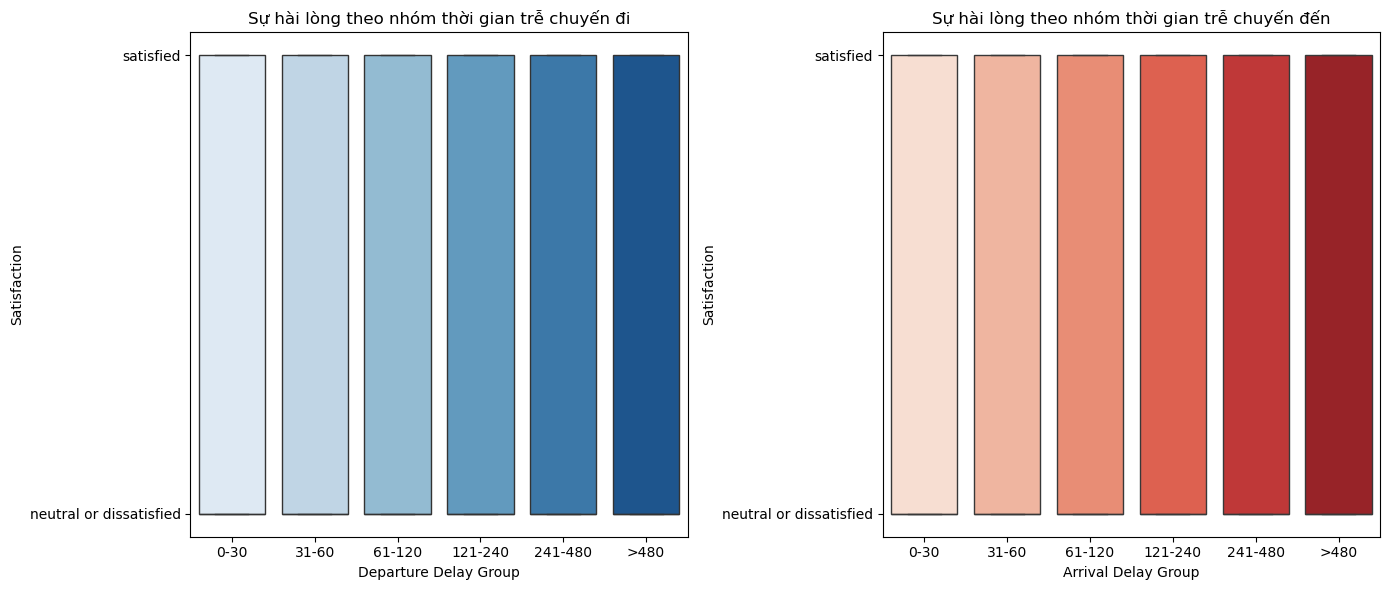

In [54]:
data_frame_copy_8 = data_frame.copy()
bins = [0, 30, 60, 120, 240, 480, 1000]
labels = ['0-30', '31-60', '61-120', '121-240', '241-480', '>480']
data_frame_copy_8['Departure Delay Group'] = pd.cut(data_frame_copy_8['Departure Delay in Minutes'], bins=bins, labels=labels)
data_frame_copy_8['Arrival Delay Group'] = pd.cut(data_frame_copy_8['Arrival Delay in Minutes'], bins=bins, labels=labels)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Departure Delay Group', y='satisfaction', data=data_frame_copy_8, ax=ax[0], palette='Blues')
ax[0].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đi')
ax[0].set_xlabel('Departure Delay Group')
ax[0].set_ylabel('Satisfaction')

sns.boxplot(x='Arrival Delay Group', y='satisfaction', data=data_frame_copy_8, ax=ax[1], palette='Reds')
ax[1].set_title('Sự hài lòng theo nhóm thời gian trễ chuyến đến')
ax[1].set_xlabel('Arrival Delay Group')
ax[1].set_ylabel('Satisfaction')

plt.tight_layout()
plt.show()


# Data Visualization (Trực quan hóa dữ liệu)

### Customer type and Personal travel impact on Satisfaction

,name,Tong,satisfaction,Percentage by Type (%)
0,Loyal Business,50.903911,0,14.956883
1,Loyal Personal,30.786880,0,27.676317
2,disloyal Business,18.154450,0,13.790422
3,disloyal Personal,0.154758,0,0.130120
4,Loyal Business,50.903911,1,35.947028
5,Loyal Personal,30.786880,1,3.110564
6,disloyal Business,18.154450,1,4.364028
7,disloyal Personal,0.154758,1,0.024638


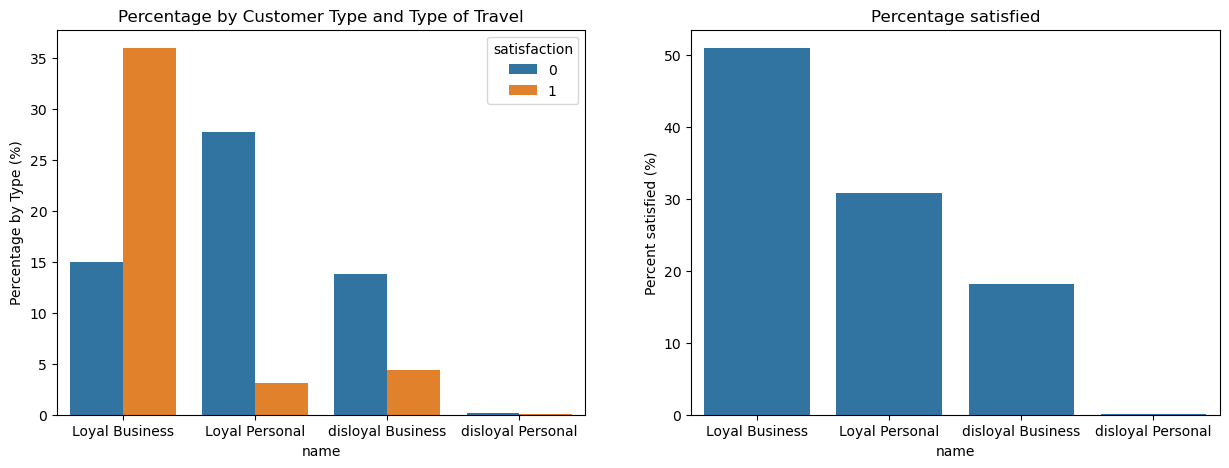

In [55]:
data_frame_copy_1 = data_frame.copy()
# satisfied = 1, neutral or dissatisfied = 0
data_frame_copy_1['satisfaction'] = data_frame_copy_1['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
# tạo bảng bằng crosstab 
df_crosstab = pd.crosstab(
    index=[data_frame_copy_1['Customer Type'], data_frame_copy_1['Type of Travel']], 
    columns=data_frame_copy_1['satisfaction'],  
    margins=True,  
    margins_name="Tong"  
)
total_count = df_crosstab.iloc[-1, -1]
percent = df_crosstab.div(total_count) * 100
percent = percent.sort_index().drop(index="Tong")
percent_reset = percent.reset_index()
percent_reset['name'] = percent_reset['Customer Type'].str.split().str[0] + " " + percent_reset['Type of Travel'].str.split().str[0]
percent_long = percent_reset.melt(  id_vars=["name","Tong"],
                                    value_vars=[0, 1],
                                    var_name="satisfaction", 
                                    value_name="Percentage by Type (%)")
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.barplot(x="name", y="Percentage by Type (%)", hue="satisfaction", data=percent_long, errorbar=None, edgecolor=None, ax=ax1)
ax1.set_title("Percentage by Customer Type and Type of Travel")
ax1.set_ylabel("Percentage by Type (%)")
data_frame_copy_1["satisfaction"] *= 100
sns.barplot(x="name", y="Tong", data=percent_long, errorbar=None, edgecolor=None, ax=ax2)
ax2.set_title("Percentage satisfied")
ax2.set_ylabel("Percent satisfied (%)");
percent_long


### Service impact on satisfaction

In [56]:
data_frame_copy_2 = data_frame.copy()
data_frame_copy_2['satisfaction'] = data_frame_copy_2['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
columns = list(data_frame.columns)[8:25]
data_col = data_frame_copy_2[columns].copy()
# matrix = data_col.corr()
# satisfaction_matrix = matrix['satisfaction'].drop('satisfaction')
# ar_index = []
# for i in satisfaction_matrix.index:
#     a = i.split(' ')
#     s = ''
#     for j in a:
#         s += j[0]
#     ar_index.append(s)
# fig,ax = plt.subplots(figsize= (15,5))
# ax.bar(ar_index , satisfaction_matrix.values, color = 'blue')
# plt.xlabel('Services')
# plt.ylabel('Corr with satisfaction')
# plt.yticks(rotation = 45)
# plt.show()
data_col

,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
129876,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
129877,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
129878,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [57]:
data_frame_copy_2 = data_frame_copy_2.fillna(0)
X_train = data_frame_copy_2.drop(columns=['satisfaction']).iloc[:70000, 8:23]
y_train = data_frame_copy_2['satisfaction'].iloc[:70000]
X_test = data_frame_copy_2.drop(columns=['satisfaction']).iloc[70000:, 8:23]
y_test = data_frame_copy_2['satisfaction'].iloc[70000:]
model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
score = model.score(X_test,y_test)
mse = mean_squared_error(y_pre , y_test)
accuracy = accuracy_score(y_test, y_pre)
pre = recall_score(y_test, y_pre)


c:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Relationship between Age and Flight Distance

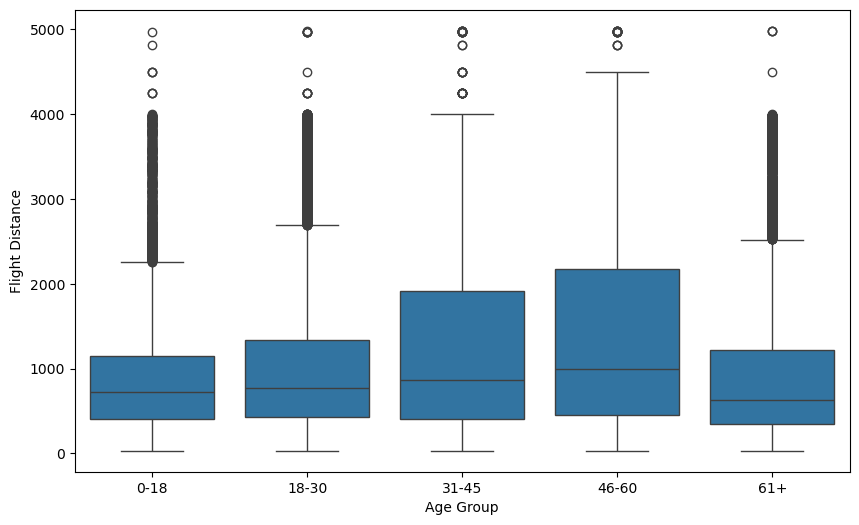

In [58]:
data_frame_copy_3 = data_frame.copy()
bins = [0, 18, 30, 45, 60, 100]  
labels = ['0-18','18-30', '31-45', '46-60', '61+']  
data_frame_copy_3['Age Group'] = pd.cut(data_frame_copy_3['Age'], bins=bins, labels=labels)
data_frame_copy_3['Age Group'].value_counts()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Flight Distance', data=data_frame_copy_3);

### c6 

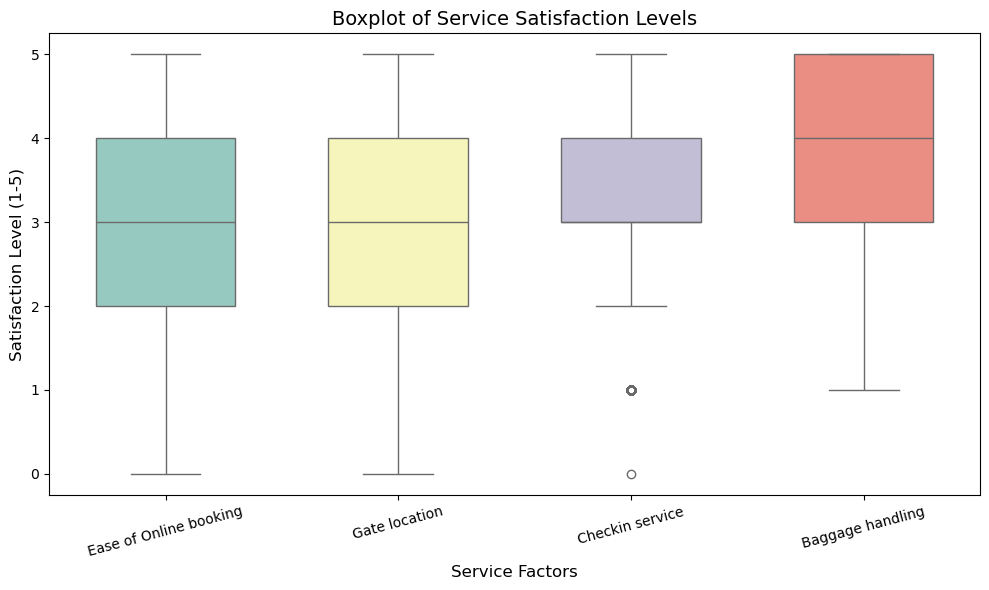

In [59]:
data_frame_copy_4 = data_frame.copy()
service_columns = ['Ease of Online booking','Gate location', 'Checkin service', 'Baggage handling']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame_copy_4[service_columns], palette="Set3", width=0.6)
plt.title("Boxplot of Service Satisfaction Levels", fontsize=14)
plt.ylabel("Satisfaction Level (1-5)", fontsize=12)
plt.xlabel("Service Factors", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

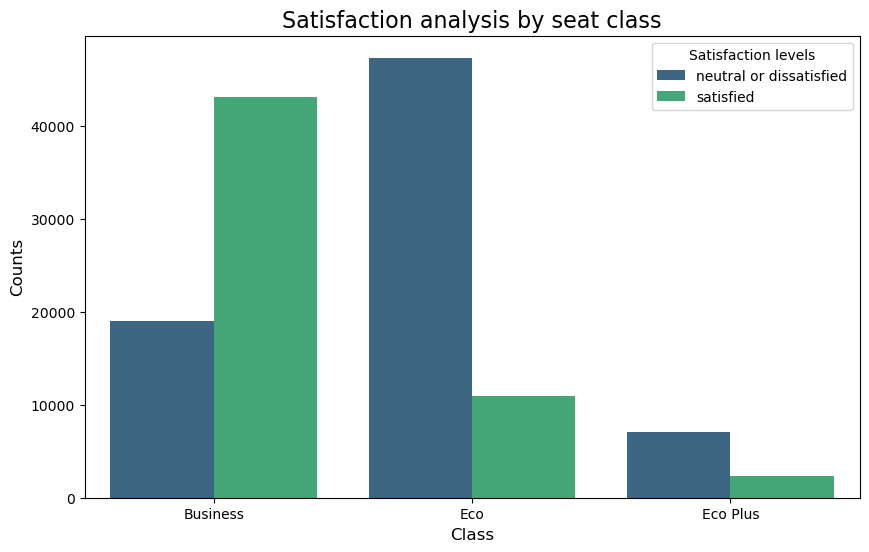

In [60]:
data_frame_copy_5 =data_frame.copy()
satisfaction_counts = data_frame_copy_5.groupby(["Class", "satisfaction"]).size().reset_index(name="Counts")
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_counts, x="Class", y="Counts", hue="satisfaction", palette="viridis")
plt.title("Satisfaction analysis by seat class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(title="Satisfaction levels")
plt.show()


# Biểu đo

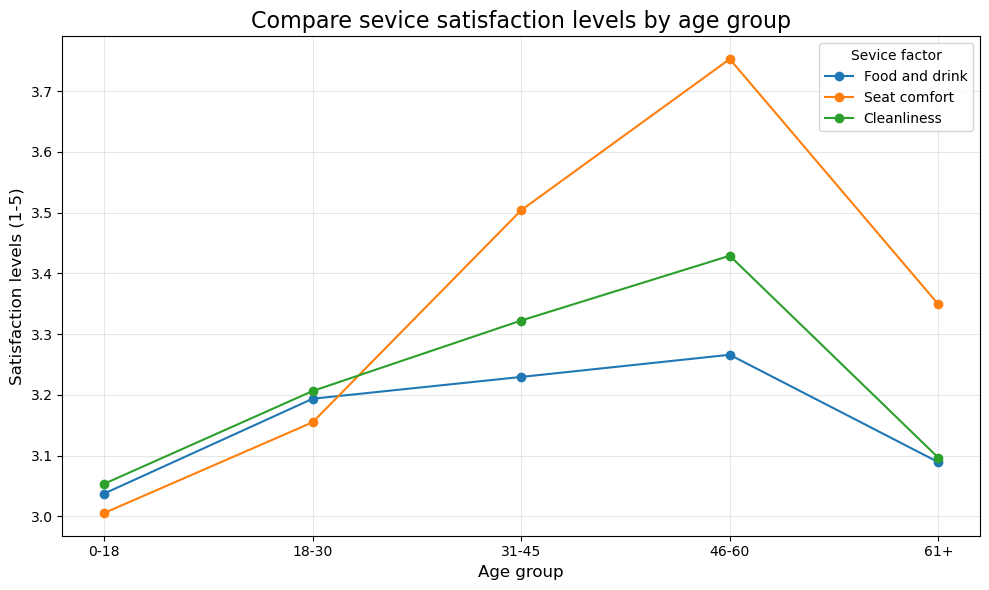

In [61]:
data_frame_copy_6 = data_frame.copy()
bins = [0, 18, 30, 45, 60, 100]   
labels = ['0-18','18-30', '31-45', '46-60', '61+'] 
data_frame_copy_6["Age Group"] = pd.cut(data_frame_copy_6["Age"], bins=bins, labels=labels)
service_columns = ["Food and drink", "Seat comfort", "Cleanliness"]
age_group_means = data_frame_copy_6.groupby("Age Group", observed=False)[service_columns].mean().reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for column in service_columns:
    plt.plot(age_group_means["Age Group"], age_group_means[column], marker="o", label=column)
plt.title("Compare sevice satisfaction levels by age group", fontsize=16)
plt.xlabel("Age group", fontsize=12)
plt.ylabel("Satisfaction levels (1-5)", fontsize=12)
plt.legend(title="Sevice factor")
plt.grid(alpha=0.3)
plt.tight_layout()
